GB / Олег Гладкий / https://gb.ru/users/3837199

__Домашнее задание__

# Урок 6. Обучение с учителем в Scikit-learn

## Задание 1. Линейная регрессия

* Импортируйте библиотеки `pandas` и `numpy`.
* Загрузите `"Boston House Prices dataset"` из встроенных наборов данных библиотеки `sklearn`. 
* Создайте датафреймы `X` и `y` из этих данных.
* Разбейте эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял `30%` от всех данных, при этом аргумент `random_state` должен быть равен `42`.
* Создайте модель линейной регрессии под названием `lr` с помощью класса `LinearRegression` из модуля `sklearn.linear_model`.
* Обучите модель на тренировочных данных _(используйте все признаки)_ и сделайте предсказание на тестовых.
* Вычислите `R2` полученных предказаний с помощью `r2_score` из модуля `sklearn.metrics`.

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_boston 

<!--  -->

### 1-1. Загрузка данных

Данные не очищаем

In [2]:
boston = load_boston()  # загружаем набор данных "Boston House Prices"
boston.keys()           # его ключи (тип этого набора данных "sklearn.utils.Bunch" похож как словарь) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

В соответствии с описанием набора данных за ключами "спрятаны" следующие данные:
* `data` — данные по строениям (объектам недвижимости), но без названия признаков (столбцов)
* `feature_names` — признаки (столбцы)
* `target` — целевые значения, фактическая цена `price` недвижимости

Загрузим данные как таблицу `DataFrame`, прибавив к набору данных `data` название колонок `feature_names`.

In [3]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [4]:
print(f"{X.shape = }\n")
print(f"X: ПРОВЕРИМ НА ПУСТЫЕ ДАННЫЕ\n{X.isnull().value_counts()}") 

X.shape = (506, 13)

X: ПРОВЕРИМ НА ПУСТЫЕ ДАННЫЕ
CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT
False  False  False  False  False  False  False  False  False  False  False    False  False    506
dtype: int64


Загрузим целевые _(фактические)_ цены

In [5]:
y = pd.DataFrame(boston['target'], columns=['price'])
y.head(3)

,price
0,24.0
1,21.6
2,34.7


In [6]:
X.shape

(506, 13)

In [7]:
print(f"{y.shape = }\n")
print(f"y: ПРОВЕРИМ НА ПУСТЫЕ ДАННЫЕ\n{y.isnull().value_counts()}")

y.shape = (506, 1)

y: ПРОВЕРИМ НА ПУСТЫЕ ДАННЫЕ
price
False    506
dtype: int64


### 1-2. Разбиение выборки
Разделение выполним при помощи метода `train_test_split` библиотеки `sklearn.model_selection` с долей тестовых объектов `30%`
* `*_train` — тренировочная _(обучающая)_ выборка 
* `*_test` — тестовая _(контрольная)_ выборка

In [8]:
from sklearn.model_selection import train_test_split  # метод для разбиения выборки на тренировочную (обучающую) и тестовую 

Разбиваем эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял `30%` от всех данных, при этом аргумент `random_state` должен быть равен `42`.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Посмотрим...
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"X_test.shape  = {X_test.shape}, y_test.shape  = {y_test.shape}")
X_train.head()

X_train.shape = (354, 13), y_train.shape = (354, 1)
X_test.shape  = (152, 13), y_test.shape  = (152, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


### 1-3. Моделирование: обучение модели
__Обучаем__ модель на тренировочных _(обучающих)_ `*_train` данных

In [10]:
from sklearn.linear_model import LinearRegression  # загружаем модель линейной регрессии

In [11]:
lr = LinearRegression()   # создаём модель
lr.fit(X_train, y_train)  # обучаем модель: передаём тренировочные данные 

LinearRegression()

__Предсказываем__ на тестовых _(контрольных)_ данных: 
* отдаём модели, при помощи функции `predict()`, тестовые (контрольные) данные `X_test`. 
* в ответ функция возвращает нам _предсказания_ для целевого показателя `y_pred`. 

In [12]:
y_pred = lr.predict(X_test)
y_pred.shape, y_pred[:3]

((152, 1),
 array([[28.64896005],
        [36.49501384],
        [15.4111932 ]]))

__Проверяем__: сравним полученные предсказанные данные `y_pred` с имеющимися фактическими `y_test`, получив разницу этих значений как ошибку предсказания `error`

In [13]:
check_test = pd.DataFrame({
    'y_test': y_test['price'],   # фактические данные (индексы не обрезаны)
    'y_pred': y_pred.flatten()   # предсказанные значения
})
check_test['error'] = check_test['y_test'] - check_test['y_pred'] # ошибка предсказания
check_test[:3]

,y_test,y_pred,error
173,23.6,28.648960,-5.048960
274,32.4,36.495014,-4.095014
491,13.6,15.411193,-1.811193


### Метрики модели
* Вычислите `R2` полученных предказаний с помощью `r2_score` из модуля `sklearn.metrics`.

Чем ближе R-квадрат к 1-це, тем выше качество модели, вроде бы...

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# ?r2_score

#### Коэффициент детерминации `R2` 

In [15]:
r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации — R2 (R-квадрат) 
r2

0.7112260057484945

#### Абсолютная средняя ошибка `mae`

In [16]:
mae = mean_absolute_error(y_test, y_pred)  # абсолютная средняя ошибка
mae

3.1627098714573902

#### Среднеквадратичная ошибка `mse`

In [17]:
mse = mean_squared_error(y_test, y_pred)   # среднеквадратичная ошибка
mse

21.51744423117712

Показатели близки к тем, которые были получены на лекции...
Но! Если мы используем методы улучшения модели (стандартизация коэфф. и исключение неважных коэфф.), то ситуация меняется в худшую сторону!

### ПРОВЕРИМ методы стандартизации признаков

* Построи модель на стандартизованных данных и получим её метрики.
* Построим ещё одну модель исключив малозначимые признаки и так же получим её метрики.


Далее, сравним все три варианта: исходный и два улучшенных.

In [18]:
#  Строим модель на стандартизованных данных
#  - Загружаем библиотеку для стандартизации данных

from sklearn.preprocessing import StandardScaler

#  - Определяем данные: приводим исходные данные к стандартизированным

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=boston['feature_names'])

X_test_std = scaler.fit_transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=boston['feature_names'])

#  - Строим модель на стандартизованных данных

lr_std = LinearRegression()                           # make model
lr_std.fit(X_train_std, y_train)                      # моделируем с тренировочными данными 

#  - Прогноз

y_pred_std = lr_std.predict(X_test_std)

#  - Метрики

mae_std = mean_absolute_error(y_test, y_pred_std)
mse_std = mean_squared_error(y_test, y_pred_std)
r2_std = r2_score(y_test, y_pred_std)

In [19]:
#  Строим модель на стандартизованных данных с выбором только по важным признакам

#  - Отсеиваем ненужные признаки
feature_names_important = [
    f for f, weight in zip(boston['feature_names'], lr_std.coef_.flatten()) 
    if np.abs(weight) > 0.5 ]

#  - Определяем данные: стандартизованные с выборкой по важным признакам
X_train_std_important = X_train_std.loc[:, feature_names_important]
X_test_std_important  = X_test_std.loc[:, feature_names_important]

#  - Строим модель 
lr_std_important = LinearRegression()                 # make model
lr_std_important.fit(X_train_std_important, y_train)  # моделируем (станд. + с глав.)

#  - Прогноз
y_pred_std_important = lr_std_important.predict(X_test_std_important) # тест: предсказываем

#  - Метрики
mae_std_important = mean_absolute_error(y_test, y_pred_std_important)
mse_std_important = mean_squared_error(y_test, y_pred_std_important)
r2_std_important = r2_score(y_test, y_pred_std_important) 

3-и модели:
Cр. абс. ошибка: 
               mae = 3.1627098714573902
           mae_std = 3.744212793154547
 mae_std_important = 3.717167844976908

Cр. кв. ошибка:
               mse = 21.51744423117712
           mse_std = 24.134791289067554
 mse_std_important = 23.85068590107355

Коэф. тетерминации:
                r2 = 0.7112260057484945
            r2_std = 0.6761000049033606
  r2_std_important = 0.6799128298280108


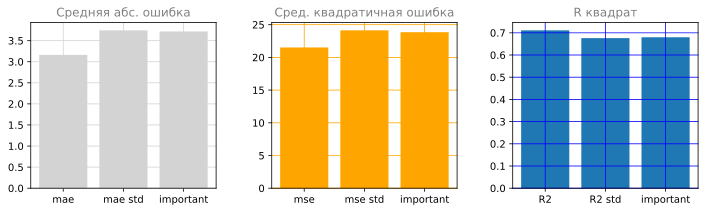

In [20]:
print(f"3-и модели:")
print(f"Cр. абс. ошибка: ")
print(f"               mae = {mae}")
print(f"           mae_std = {mae_std}")
print(f" mae_std_important = {mae_std_important}")
print(f"")
print(f"Cр. кв. ошибка:")
print(f"               mse = {mse}")
print(f"           mse_std = {mse_std}")
print(f" mse_std_important = {mse_std_important}")
print(f"")
print(f"Коэф. тетерминации:")
print(f"                r2 = {r2}")
print(f"            r2_std = {r2_std}")
print(f"  r2_std_important = {r2_std_important}")

from matplotlib import pyplot as plt

plt.style.use('default')
fig, ax = plt.subplots(nrows=1, ncols=3)
ax1, ax2, ax3 = ax
fig.set_size_inches(12, 3)                     # размер рисунка в дюймах
fig.subplots_adjust(wspace=0.3, hspace=0.3)   # расстояния между графиками  
ax1.bar(['mae', 'mae std', 'important'], [mae, mae_std, mae_std_important], color='lightgray', label='MAE')
ax1.set_title('Средняя абс. ошибка', color='gray')
ax1.grid(True, color='lightgray')
# ax1.legend()
ax2.bar(['mse', 'mse std', 'important'], [mse, mse_std, mse_std_important], color='orange', label='MSE')
ax2.set_title('Сред. квадратичная ошибка', color='gray')
ax2.grid(True, color='orange')
# ax2.legend()
ax3.bar(['R2', 'R2 std', 'important'], [r2, r2_std, r2_std_important], label='R2')
ax3.set_title('R квадрат', color='gray')
ax3.grid(True, color='blue')
# ax3.legend()
plt.show()

__Вывод__: модель мы построили и попытались её улучшить, но... все метрики для улучшенной модели стали хуже! :-(

__ВОПРОС__: как же нам быть с таким "улучшением"?

## Задание 2

Создайте модель под названием `model` с помощью `RandomForestRegressor` из модуля `sklearn.ensemble`.
* Сделайте агрумент `n_estimators` равным `1000`,
* `max_depth` должен быть равен `12` и `random_state` сделайте равным `42`.
* Обучите модель на тренировочных данных аналогично тому, как вы обучали модель `LinearRegression`, но при этом в метод `fit` вместо датафрейма `y_train` поставьте `y_train.values[:, 0]`, чтобы получить из датафрейма одномерный массив `Numpy`,
так как для класса `RandomForestRegressor` в данном методе для аргумента `y` предпочтительно применение массивов вместо датафрейма.
* Сделайте предсказание на тестовых данных и посчитайте `R2`. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Строим модель
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
# Обучаем её на тренировочных данных
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [23]:
# Метрики модели на обучающих данных
y_pred_Forest_train = model.predict(X_train)

mae_Forest_train = mean_absolute_error(y_train, y_pred_Forest_train)
mse_Forest_train = mean_squared_error(y_train, y_pred_Forest_train)
r2_Forest_train = r2_score(y_train, y_pred_Forest_train)
print(f"СЛУЧАЙНЫЙ ЛЕС, точность модели на треировочных данных: ")
print(f"mae_Forest_train = {mae_Forest_train}")
print(f"mse_Forest_train = {mse_Forest_train}")
print(f" r2_Forest_train = {r2_Forest_train}")

СЛУЧАЙНЫЙ ЛЕС, точность модели на треировочных данных: 
mae_Forest_train = 0.9354248059232715
mse_Forest_train = 1.8944478625753163
 r2_Forest_train = 0.9784468411299835


In [24]:
# Тестируем
y_pred_Forest = model.predict(X_test)

# Метрики
mae_Forest = mean_absolute_error(y_test, y_pred_Forest)
mse_Forest = mean_squared_error(y_test, y_pred_Forest)
r2_Forest = r2_score(y_test, y_pred_Forest)

print(f"СЛУЧАЙНЫЙ ЛЕС, тестовые данные: ")
print(f"mae_Forest = {mae_Forest}")
print(f"mse_Forest = {mse_Forest}")
print(f" r2_Forest = {r2_Forest}") 

СЛУЧАЙНЫЙ ЛЕС, тестовые данные: 
mae_Forest = 2.0831253879090608
mse_Forest = 9.334548946165196
 r2_Forest = 0.87472606157312


__Вывод__: 
* результат модели «Случайный» лес даёт гораздо лучший результат, чем линейная регрессия в задании-1
* но, точность «Случайного леса» на тренировочных данных выше, чем на тестовых данных — есть подозрения переобучения модели, но это всё равно не существенно.

## Задание 3*

* Вызовите документацию для класса `RandomForestRegressor`, найдите информацию об атрибуте `feature_importances_`. 
* С помощью этого атрибута найдите сумму всех показателей важности, 
* установите, какие два признака показывают наибольшую важность.

In [25]:
# ?RandomForestRegressor

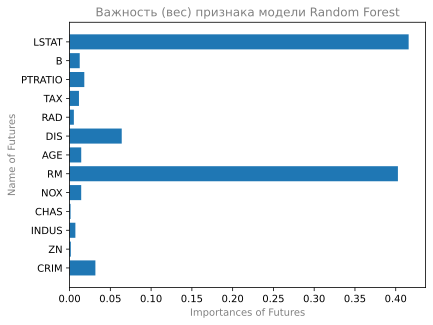

In [26]:
# Важность каждого признака в модели -- атрибут feature_importances_

plt.barh(boston['feature_names'], model.feature_importances_)

plt.xlabel('Importances of Futures', color='gray')
plt.ylabel('Name of Futures', color='gray')
plt.title('Важность (вес) признака модели Random Forest', color='gray')
plt.show()

Получим среднее значение:

In [27]:
model_feature_mean = model.feature_importances_.mean()
print(f"Среднее значение важностей: {model_feature_mean}")

Среднее значение важностей: 0.07692307692307693


Два самых важных признака:

In [28]:
# Выделим два самых важных признака: вначале посмотрим на них в цифрах: 

feature_importances_Forest = pd.DataFrame(
    model.feature_importances_, 
    columns=['feature_importances'], 
    index = boston['feature_names']
)
feature_importances_Forest

,feature_importances
CRIM,0.031676
ZN,0.001543
INDUS,0.007138
CHAS,0.001236
NOX,0.014269
RM,0.402682
AGE,0.014299
DIS,0.063973
RAD,0.005281
TAX,0.011525


In [29]:
# Два самых важных признака:

feature_grater_two = feature_importances_Forest.sort_values('feature_importances').iloc[-2:, :]
feature_grater_two

,feature_importances
RM,0.402682
LSTAT,0.415847


---